# The Spark Foundation

### Task-1

### ------------------------------------------------------------------------------------------------------------------------------------------------------


### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

What will be predicted score if a student study for 9.25 hrs in a day?

#### Importing all libraries required in this notebook

In [45]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#### Reading data

In [12]:
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Staticstics of data

In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### checking for null values

In [14]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Vizualization

#### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

####                                       Plotting the distribution of scores   

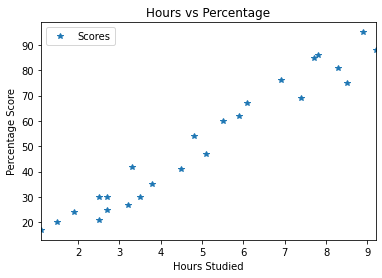

In [46]:
s_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

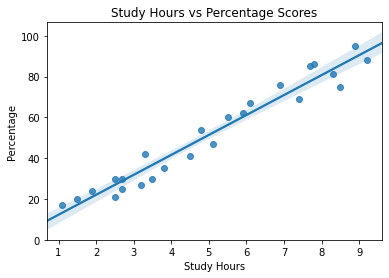

In [20]:
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [21]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
 

###### First I will be making our linear regression algorithm from scratch and then I will compare it with the built-in function sklearn.linear_model.LinearRegression()

In [23]:
y_train_new = y_train.reshape(-1,1)  
ones = np.ones([X_train.shape[0], 1]) # create a array containing only ones 
X_train_new = np.concatenate([ones, X_train],1) # concatenate the ones to X matrix

In [24]:
# creating the theta matrix
# notice small alpha value
alpha = 0.01
iters = 5000

theta = np.array([[1.0, 1.0]])
print(theta)

[[1. 1.]]


In [25]:
# Cost Function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [26]:
computeCost(X_train_new, y_train_new, theta)

1398.8529999999998

The value of 1398.85299999998 is the initial value. The aim will be to minimise this to as small as possible

#### Gradient Descent

In [28]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum(((X @ theta.T) - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [29]:
g, cost = gradientDescent(X_train_new, y_train_new, theta, alpha, iters)  
print("Intercept -", g[0][0])
print("Coefficient- ", g[0][1])
print("The final cost obtained after optimisation - ", cost)

Intercept - 2.0182067254844513
Coefficient-  9.910649168968112
The final cost obtained after optimisation -  15.449091188857446


From "1398.852999" to "15.727417763727209" that is a huge decrease in cost

#### Now Let's Plot our result 

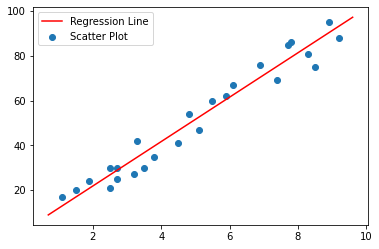

In [30]:
# Plotting scatter points
plt.scatter(X, y, label='Scatter Plot')
axes = plt.gca()

# Plotting the Line
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()

So, the above method was building our regression algorithm from scratch and implementing it on the data-set. However, as you can see this is in crude form, a more elegant would be to make a class of it.

The hyper-parameters such "alpha" also known as the learning rate is optimised by hit and trial method, which should not be the practice.

So, instead of writing this long code, python has an-inbuilt library for the same. Let's try that too.

### Using Scikit-Learn library

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [32]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.91065648]
Intercept -  2.018160041434683


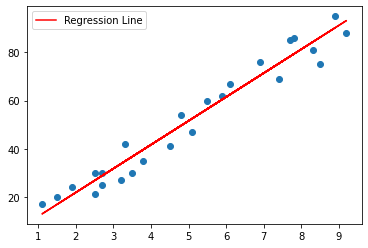

In [33]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

As we can see that both the graph are identical and even the intercepts and coefficient of the line are same. So my effort of making linear regression algorithm from scratch has been a success!!

But as you can see, it is also pretty easy to use the built-in function. Few lines of code and your work is done.Viola!!

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [47]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105356


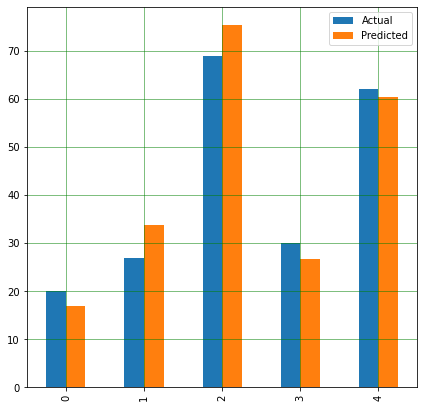

In [40]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [41]:
# Testing with some new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


R-squared gives the goodness of the fit and as can be seen it is 96.7% which is really good. This means that the algorithm has proven to be good for the given data.

It can also be said that the model's accuracy is 96.78%

NOTE - In practice, you’ll never see a regression model with an R2 of 100%.

This concludes this Notebook.



### By Rishabh Varshney

## THANK YOU¶